Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8826 - loss: 0.4050 - val_accuracy: 0.9006 - val_loss: 0.3544
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9265 - loss: 0.2698 - val_accuracy: 0.9308 - val_loss: 0.2593
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9363 - loss: 0.2418 - val_accuracy: 0.9311 - val_loss: 0.2896
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9341 - loss: 0.2498 - val_accuracy: 0.9268 - val_loss: 0.2848
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9378 - loss: 0.2506 - val_accuracy: 0.8821 - val_loss: 0.7003
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9351 - loss: 0.2695 - val_accuracy: 0.9430 - val_loss: 0.3615
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9405 - loss: 0.2370 - val_accuracy: 0.9190 - val_loss: 0.4866
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9374 - loss: 0.2678 - 

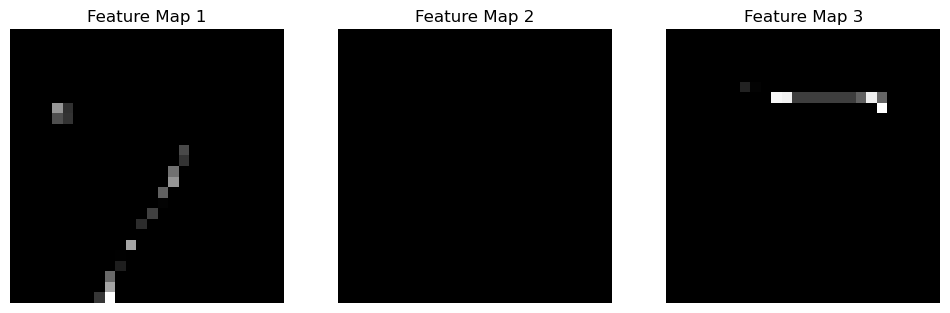

Initial Accuracy: 0.9006


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

inputs = keras.Input(shape=(28, 28, 1))
conv_layer = layers.Conv2D(3, (3, 3), activation='relu')(inputs)
flattened = layers.Flatten()(conv_layer)
outputs = layers.Dense(10, activation='softmax')(flattened)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)

activation_model = keras.Model(inputs=model.input, outputs=conv_layer)
feature_maps = activation_model.predict(x_test[:1])

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axes[i].imshow(feature_maps[0][:, :, i], cmap='gray')
    axes[i].set_title(f'Feature Map {i+1}')
    axes[i].axis('off')
plt.show()

initial_accuracy = history.history['val_accuracy'][0]
print(f'Initial Accuracy: {initial_accuracy:.4f}')
